Question 1 : What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?
- Type I error = rejecting H₀ when it is true (false positive). Type II error = failing to reject H₀ when it is false (false negative). Lowering α reduces Type I but increases Type II; increasing sample size reduces both.

Question 2:What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?
- p-value = probability of getting data at least as extreme as observed, assuming H₀ is true. If p ≤ α → reject H₀. It is not P(H₀|data).

Question 3:Explain the difference between a Z-test and a T-test, including when to use each.
- Z-test: use when population σ is known or sample is large (n≥30). T-test: use when σ unknown and sample small (n<30); t uses df = n−1.

Question 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?
- CI = sample_mean ± margin_of_error. margin = critical_value × standard_error. Larger n → smaller margin; higher confidence → larger margin.

Question 5: Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?
- ANOVA compares means across 3+ groups by comparing between-group variance to within-group variance (F-statistic). Assumptions: independence, approximate normality per group, and homogeneity (equal) variances. If assumptions fail, use Welch’s ANOVA or Kruskal–Wallis.





In [3]:
#Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st

np.random.seed(42)
def one_sample_z_test(sample, popmean, popsigma, alpha=0.05):
    n = len(sample)
    xbar = np.mean(sample)
    se = popsigma / np.sqrt(n)
    z = (xbar - popmean) / se
    p_two = 2 * (1 - stats.norm.cdf(abs(z)))
    return {'n': n, 'xbar': xbar, 'z': z, 'p_two_tailed': p_two, 'alpha': alpha}

popmean = 100
popsigma = 15
n = 200
sample = np.random.normal(loc=103.0, scale=popsigma, size=n)

res_z = one_sample_z_test(sample, popmean, popsigma)
print("One-sample Z-test result:")
print(res_z)
if res_z['p_two_tailed'] < res_z['alpha']:
    print("Decision: Reject H0 — significant difference.")
else:
    print("Decision: Fail to reject H0 — no significant difference.")

print("\nInterpretation: If p <= alpha then sample mean is unlikely under H0 and we reject H0.")




One-sample Z-test result:
{'n': 200, 'xbar': np.float64(102.38843552241873), 'z': np.float64(2.2518386057721593), 'p_two_tailed': np.float64(0.02433247304264774), 'alpha': 0.05}
Decision: Reject H0 — significant difference.

Interpretation: If p <= alpha then sample mean is unlikely under H0 and we reject H0.



Binomial simulation summary:
Empirical mean: 4.9679
Theoretical mean (n*p): 5.0
Empirical var: 2.4661162016201614
Theoretical var (n*p*(1-p)): 2.5


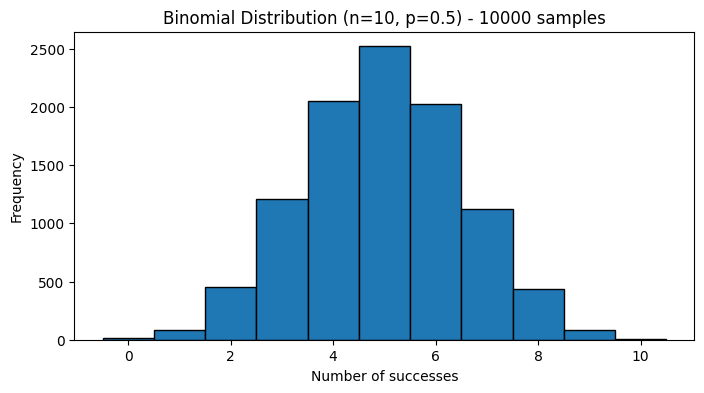


Interpretation: The histogram shows the discrete distribution centered near n*p.


In [4]:
#Question 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

trials = 10
p = 0.5
size = 10000
binom_samples = np.random.binomial(n=trials, p=p, size=size)

print("\nBinomial simulation summary:")
print("Empirical mean:", binom_samples.mean())
print("Theoretical mean (n*p):", trials * p)
print("Empirical var:", binom_samples.var(ddof=1))
print("Theoretical var (n*p*(1-p)):", trials * p * (1-p))

plt.figure(figsize=(8,4))
plt.hist(binom_samples, bins=np.arange(-0.5, trials+1.5, 1), edgecolor='black')
plt.title(f'Binomial Distribution (n={trials}, p={p}) - {size} samples')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.show()

print("\nInterpretation: The histogram shows the discrete distribution centered near n*p.")





Population (exponential) mean and variance: 2.000924490269871 3.9911318048197084
Sample means mean: 1.9963577716219065
Sample means variance: 0.07521826685990078


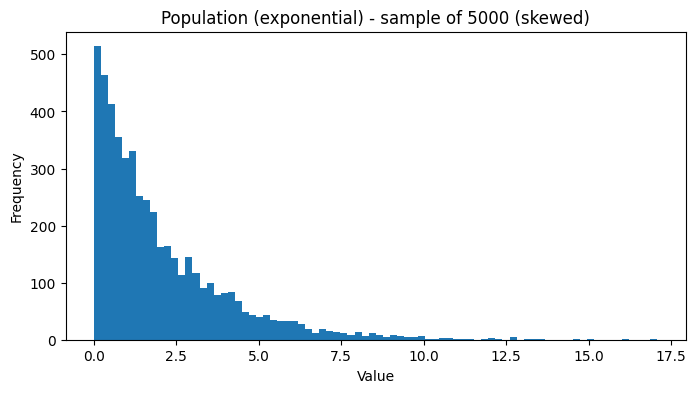

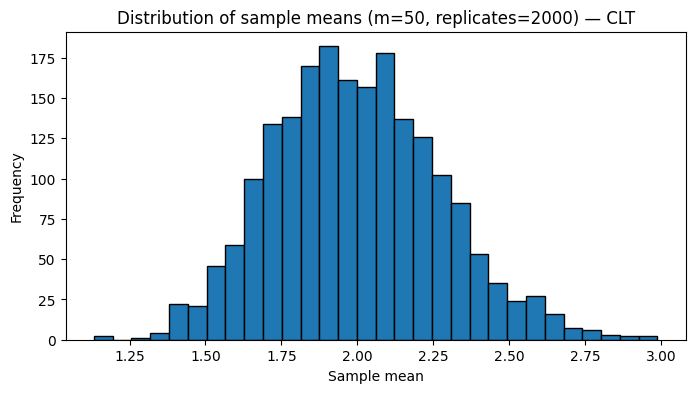


Interpretation: Even though population is skewed, distribution of sample means is approximately normal.


In [5]:
#Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.
pop = np.random.exponential(scale=2.0, size=500000)
pop_mean = pop.mean()
pop_var  = pop.var()
print("\nPopulation (exponential) mean and variance:", pop_mean, pop_var)

m = 50
replicates = 2000
sample_means = np.array([np.mean(np.random.choice(pop, size=m, replace=False)) for _ in range(replicates)])

print("Sample means mean:", sample_means.mean())
print("Sample means variance:", sample_means.var(ddof=1))

plt.figure(figsize=(8,4))
plt.hist(pop[:5000], bins=80)
plt.title("Population (exponential) - sample of 5000 (skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title(f"Distribution of sample means (m={m}, replicates={replicates}) — CLT")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.show()

print("\nInterpretation: Even though population is skewed, distribution of sample means is approximately normal.")





95% CI using T (sigma unknown): mean=74.6648, CI=(71.0209, 78.3086), MOE=3.6439


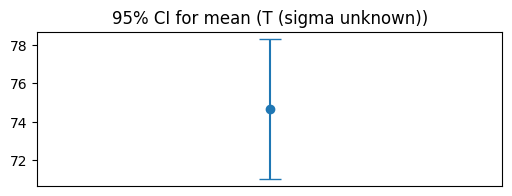

Interpretation: Use t-based CI when sigma unknown. MOE depends on se and critical value.


In [7]:
#Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.
def confidence_interval_mean(data, confidence=0.95, sigma_known=None):
    xbar = np.mean(data)
    n = len(data)
    if sigma_known is not None:
        se = sigma_known / np.sqrt(n)
        crit = stats.norm.ppf((1 + confidence) / 2)
        method = 'Z (sigma known)'
    else:
        s = np.std(data, ddof=1)
        se = s / np.sqrt(n)
        crit = stats.t.ppf((1 + confidence) / 2, df=n-1)
        method = 'T (sigma unknown)'
    moe = crit * se
    lower = xbar - moe
    upper = xbar + moe

    print(f"\n{int(confidence*100)}% CI using {method}: mean={xbar:.4f}, CI=({lower:.4f}, {upper:.4f}), MOE={moe:.4f}")

    plt.figure(figsize=(6,2))
    plt.errorbar([1], [xbar], yerr=[moe], fmt='o', capsize=8)
    plt.xlim(0.5, 1.5)
    plt.xticks([])
    plt.title(f'{int(confidence*100)}% CI for mean ({method})')
    plt.show()
    return (xbar, lower, upper, moe, method)

sample_for_ci = np.random.normal(loc=75, scale=12, size=40)
ci_result = confidence_interval_mean(sample_for_ci, confidence=0.95, sigma_known=None)

print("Interpretation: Use t-based CI when sigma unknown. MOE depends on se and critical value.")




In [8]:
#Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

observed = np.array([40, 55, 25])
expected_prop = np.array([1/3, 1/3, 1/3])
expected = expected_prop * observed.sum()

chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
print("\nChi-square goodness-of-fit:")
print("Observed:", observed)
print("Expected:", expected.astype(float))
print("Chi2 stat:", chi2_stat, "p-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Decision: Reject H0 — observed distribution differs from expected.")
else:
    print("Decision: Fail to reject H0 — no strong evidence of difference.")

print("\nInterpretation: If p small, observed counts do not fit expected distribution.")



Chi-square goodness-of-fit:
Observed: [40 55 25]
Expected: [40. 40. 40.]
Chi2 stat: 11.25 p-value: 0.0036065631360157305
Decision: Reject H0 — observed distribution differs from expected.

Interpretation: If p small, observed counts do not fit expected distribution.
